In [ ]:
#Question 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math

In [ ]:
# The equation is non-autonomous because the t value of the denominatior of the tanh function has an explicit impact on the function.
# Additonally, a "t" value is a function of two trignometric equations which results in a non-autonomous function.
# If the derivative only had the first term ( -alpha*x(t) ) then the equation would have been autonomous

In [ ]:
#Iterative equation with Euler's method
# x(t+dt)=x(t) + dt( -0.5*x(t) + tanh( cos(5t)/1+t ) )

In [ ]:
class Numerical_methods:
    
    def __init__(self,f):  
        
        self.f=f
        self.x=[]
        self.t=[]
    
    def Initialise(self,x_start,t_start):
        
        self.x=x_start
        self.t=t_start
        
        
    def Euler(self,dt,N_iter):
        
        X=np.zeros([N_iter])
        T=np.zeros([N_iter])
        
        X[0]=np.copy(self.x)
        T[0]=np.copy(self.t)
        
        for n in range(1,N_iter):
        
            self.x=self.x+dt*self.f(self.x,self.t)
            X[n]=np.copy(self.x)
            
            self.t=self.t+dt
            T[n]=np.copy(self.t)
            
        return X, T
    
    def MidPoint(self,dt,N_iter):
        
        X=np.zeros([N_iter])
        T=np.zeros([N_iter])
        
        X[0]=np.copy(self.x)
        T[0]=np.copy(self.t)
        
        for n in range(1,N_iter):
            
            x_mp=self.x+dt/2*self.f(self.x,self.t)
            self.x=self.x+dt*self.f(x_mp,self.t+dt/2)
            
            
            X[n]=np.copy(self.x)
            
            self.t=self.t+dt
            T[n]=np.copy(self.t)
            
        return X, T
    
    def RungeKutta2(self,dt,N_iter):
        
        X=np.zeros([N_iter])
        T=np.zeros([N_iter])
        
        X[0]=np.copy(self.x)
        T[0]=np.copy(self.t)
        
        for n in range(1,N_iter):
            
            k1=self.f(self.x,self.t)
            k2=self.f(self.x+dt*k1,self.t+dt)    
                        
            self.x=self.x+dt*(k1+k2)/2
            
            X[n]=np.copy(self.x)
            
            self.t=self.t+dt
            T[n]=np.copy(self.t)
            
        return X, T

                

In [ ]:
## Point 2. 

def f(x,t):     ## Definition of the function. t needs to be an input even if the function does not use it, as in this case.
                ## This formulation permits us to be general and to apply the same code to non autonomous systems.
    
    alpha=0.5
    omega=5
    y=-alpha*x + math.tanh( math.cos(omega*t) /1+t )
    
    return y

In [ ]:
NM=Numerical_methods(f)
##Initial conditions
x_start=0     
t_start=0
NM.Initialise(x_start,t_start)     ## Setting the initial conditions in the object

dt=0.1
N_iter=int(10/dt)

X_euler1,ts1=NM.Euler(dt,N_iter)

In [ ]:
NM.Initialise(x_start,t_start)

dt=0.001
N_iter=int(10/dt)

X_euler2,ts2=NM.Euler(dt,N_iter)


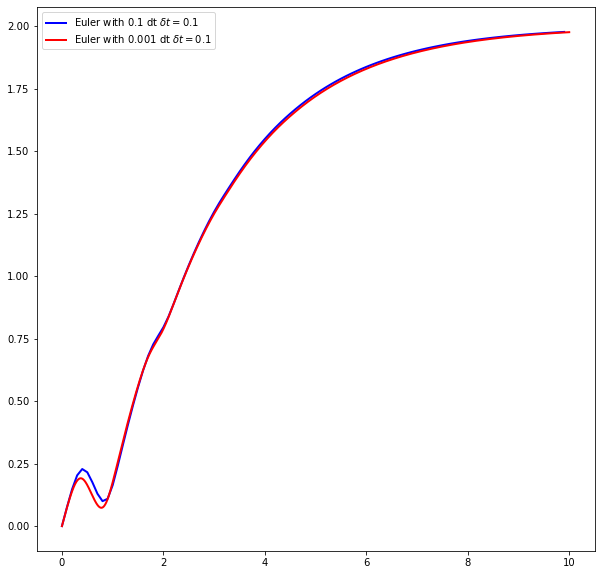

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

p1,=plt.plot(ts1,X_euler1,color='b',lw=2)

p2,=plt.plot(ts2,X_euler2,color='red',lw=2)

plt.legend([p1,p2],['Euler with 0.1 dt $\delta t=0.1$','Euler with 0.001 dt $\delta t=0.1$'])

In [ ]:
# The graphs are very similar which shows that a very smaller learning rate may not be needed to simulate the system
# The graph with the smaller learning rate is more smoother as it takes more time to learn the behaviour of the system 
# The 2 solutions are different because of the differing learning rates which results in slightly different predictions from the systems
# The graph with the lower learning rate is more accurate as it moves in a smaller steps when predicting so it wouldn't overshoot or undershoot the actual prediction severely

In [ ]:
# Runge-kutta 2 is another high order method used to help simulate dynamical systems.
# Similar to Euler's method, Runge-kutta 2 uses a linear combination of the first order derivative and another equation to arrive at the solution.


In [ ]:
NM.Initialise(x_start,t_start)

dt=0.1
N_iter=int(10/dt)

X_RungeKutta2a,ts3=NM.RungeKutta2(dt,N_iter) 

In [ ]:
NM.Initialise(x_start,t_start)

dt=0.01
N_iter=int(10/dt)

X_RungeKutta2b,ts4=NM.RungeKutta2(dt,N_iter) 

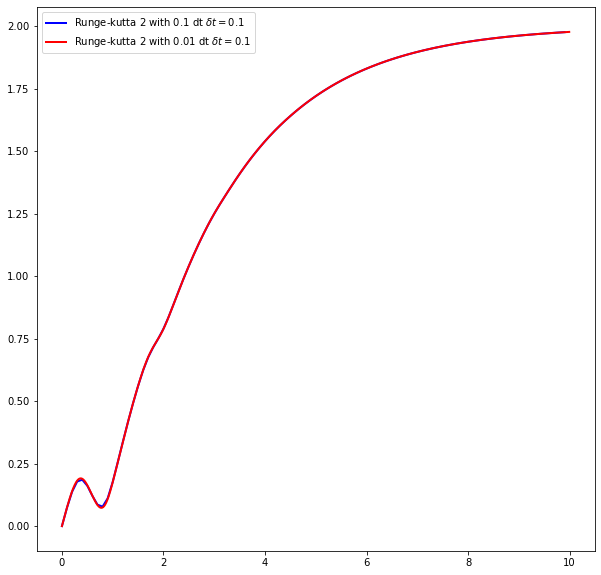

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

p1,=plt.plot(ts3,X_RungeKutta2a,color='b',lw=2)

p2,=plt.plot(ts4,X_RungeKutta2b,color='red',lw=2)

plt.legend([p1,p2],['Runge-kutta 2 with 0.1 dt $\delta t=0.1$','Runge-kutta 2 with 0.01 dt $\delta t=0.1$'])

In [ ]:
# Runge-kutta gives a near smooth curve because of the lower error as compared to using Euler's method


In [ ]:
## The jacobian is
J=[[-2,1],[-3,1]]
eig=np.linalg.eig(J) ## np.linealg.eig returns the eigenvalues and eigenvectors of the matrix respectively

eigenvalues=np.array(eig[0]) ## Save the eigenvalues

eigenvectors=np.array(eig[1]) ## Save the eigenvectors

print('The eigenvalues are: ',eig[0], 'The eigenvectors are: ', eigenvectors[:,0],eigenvectors[:,1])
print('Since the real parts of the eigenvalues are both positive, the equilibrium point (0,0) is unstable')

The eigenvalues are:  [-0.5+0.8660254j -0.5-0.8660254j] The eigenvectors are:  [0.4330127-0.25j 0.8660254+0.j  ] [0.4330127+0.25j 0.8660254-0.j  ]
Since the real parts of the eigenvalues are both positive, the equilibrium point (0,0) is unstable


In [ ]:
# To study the stability of the system, we have to look at the signs of the eigenvalues 
# We look at the real parts of the eigenvalues, the real parts are negative so the system is stable


In [ ]:
# To find the direction of the phase plot, take a random point on the plot and multiply it by the Jacobian.
# Jacobian * coordinates
# This will tell you the direction of the phase plot
# Looking at the real values will tell you whether it moves in or out

In [ ]:
# I will take 2 points and plot them on a chart
# First point -> [0,1]
J=np.array([[-2,1],[-3,1]])
A=np.array([[0],[1]])

B=J@A
print(B)

[[1]
 [1]]


In [ ]:
C=np.array([[-3],[-2]])
D=J@C
print(D)

[[4]
 [7]]


In [ ]:
X_values=[A[0],B[0]]
Y_values=[A[1],B[1]]

[]

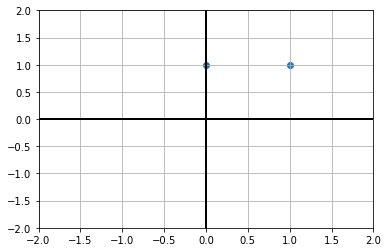

In [ ]:
plt.scatter(X_values,Y_values)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.plot([-2,2],[0,0], linewidth=2, color='black')
plt.plot([0,0],[-2,2], linewidth=2, color='black')
plt.grid()
plt.plot()

In [ ]:
# From the above plot, it can be seen that the direction is clockwise

In [ ]:
X_values=[C[0],D[0]]
Y_values=[C[1],D[1]]

[]

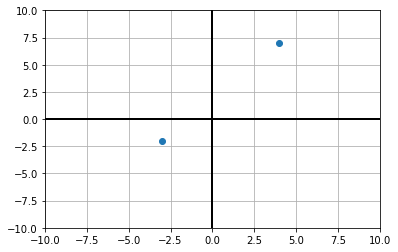

In [ ]:
plt.scatter(X_values,Y_values)
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.plot([-10,10],[0,0], linewidth=2, color='black')
plt.plot([0,0],[-10,10], linewidth=2, color='black')
plt.grid()
plt.plot()

In [ ]:
# Double checking with another point verifies this as we see the movement being clockwise

In [ ]:
# The graph moves inwards clockwise so a clockwise spiral will give us a sketch of the phase plot.
# The clockwise direction can also be pinpointed by looking at the real parts of the eigenvalues. As they are negative, plotting a random point would show that the point would shift clockwise.

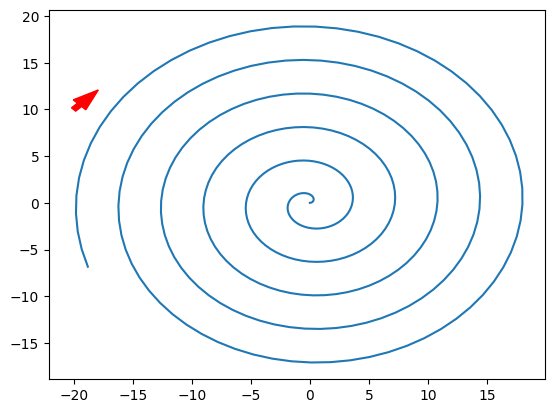

In [26]:
r = np.linspace(0,20,360)
t = np.linspace(0,2000,360)
g = r*np.cos(np.radians(t))
h = r*np.sin(np.radians(t))

import matplotlib.pyplot as plt

# Arrow starting positions
x = [-20]
y = [10]


# Arrow attributes
arrow_start = (x[0], y[0])  
arrow_dx = 0.5  
arrow_dy = 0.5  
arrow_color = 'red' 
arrow_width = 0.5  
arrow_length = 1 

# Add the arrow to the plot
plt.arrow(*arrow_start, arrow_dx, arrow_dy, color=arrow_color, width=arrow_width)

# Display the plot

plt.plot(g,h)

In [ ]:
# Defining the function for question 2

def f(x,t):     
    
    z=np.zeros([np.shape(x)[0]])
    
    z[0]=-2*x[0]+x[1]
    z[1]=-3*x[0]+x[1]
    
    return z

In [ ]:
# Defining the class for Euler's method
class Numerical_methods:
    
    def __init__(self,f):  
        
        self.f=f
        self.x=[]
        self.t=[]
        self.N_dim=[]
        
        
    def Initialise(self,x_start,t_start):
        
        
        self.N_dim=np.shape(x_start)[0]
        self.x=x_start
        self.t=t_start
        
        
    def Euler(self,dt,N_iter):
        
        X=np.zeros([self.N_dim,N_iter])
        T=np.zeros([N_iter])
        
        X[:,0]=np.copy(self.x)               ## The main differenece in comparison to the class in the previous lab is in the definition 
                                             ## and utilisation of variables x and X, which are multidimensional.  
        
        T[0]=np.copy(self.t)
        
        for n in range(1,N_iter):
        
            self.x=self.x+dt*f(self.x,self.t)
            X[:,n]=np.copy(self.x)
            
            self.t=self.t+dt
            T[n]=np.copy(self.t)
            
        return X, T


In [ ]:
NM=Numerical_methods(f)          ## Object definition

##Initial conditions

dt=0.001                         ## Value of dt
N_iter=int(100/dt)               ## Number of iteration. 

N_tr=10                          # Number of solutions 

## I save different solutions for different initial conditions in the following variable
X_euler=np.zeros([N_tr,2,N_iter])


for i in range(N_tr):
    
    x_start=[10+5*i,10]          # Different initial conditions for different solutions
    t_start=0.


    NM.Initialise(x_start,t_start)     ## Setting the initial conditions in the object

        
    X_euler[i,:,:],ts=NM.Euler(dt,N_iter)     ## Pe

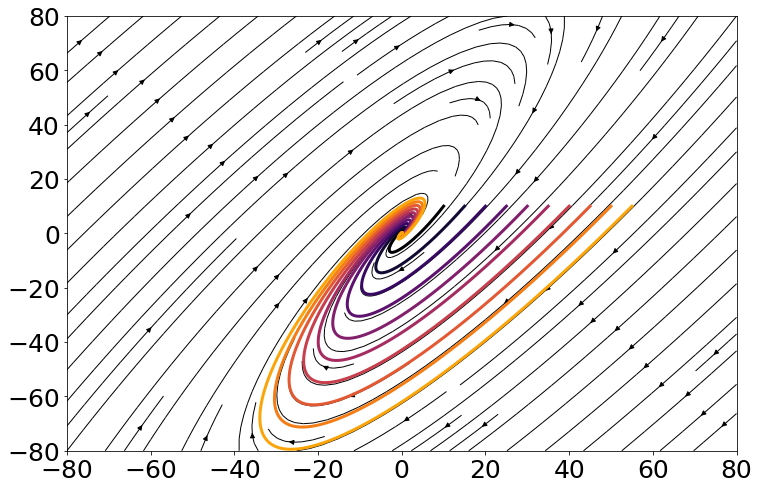

In [ ]:
# Plotting the phase plot

N_x=20

x1=np.linspace(-80,80,N_x)           ## x values considered
x2=np.linspace(-80,80,N_x)           ## y values considered

X1,X2=np.meshgrid(x1,x2)             ## np.meshgrid creates a grid with the data across the x and y dimension

Z1=np.zeros([N_x,N_x])               ## This contains the direction across x for each data point in the grid
Z2=np.zeros([N_x,N_x])               ## This contains the direction across y for each data point in the grid

dt=0.01
for i in range(N_x):
    for j in range(N_x):
        
        
        prime=f([X1[i,j],X2[i,j]],0)  ## The 'arrows' are simply the function defining the system of differential equations 
                                      ## evaluated at different points of the grid
            
        Z1[i,j]=prime[0]              ## I save the value of the 'arrows' across x for the data point considered
        Z2[i,j]=prime[1]              ## I save the value of the 'arrows' across y for the data point considered

        
plt.rcParams.update({'font.size': 25})        

fig, ax = plt.subplots(figsize=(12, 8))
        
Q = plt.streamplot(X1, X2, Z1, Z2, color='black',density=1.2,linewidth=1)  ## plt.stgreamplot does a plot of the arrows Z1 (value of the arrow across x) and Z2 (value of the arrow across y) at 
                                                                           ## the positions X1 and X2 
                                                                           

cl=cm.inferno(np.linspace(0,0.8,N_tr))    ## colormap used to plot the different solutions

## Plot the solutions iteratively
for i in range(N_tr):
    
    plt.plot(X_euler[i,0,:],X_euler[i,1,:],color=cl[i,:],linewidth=3)



In [ ]:
# Exercise 3

In [3]:
## The following class defines the leaky integrate and fire neuron
## The method Response needs to receive the external input V(t) and the value of tau used to integrate
## The method response gives as output the variable V(t) across time and the instances when the neuron fires

class LIF:
    
    def __init__(self):  
        
        self.tau=10               ## Predefined value of tau
        self.x_res=0               ## Resting potential
        self.theta=1.5               ## Threshold
        self.dt=0.01               ## Discretization step for the simulation
        
    def Response(self,Input,tau):
        
        self.tau=tau
        T=np.shape(Input)[0]
        x=np.zeros([T])
        Spike=np.zeros([T])
        
        x[0]=self.x_res
        
        for t in range(1,T):
            
            x[t]=(1-self.dt/self.tau)*x[t-1]+self.dt/self.tau*Input[t]
            
            ## If the activity is grater then a threshold, the neuron fires and the the variable spike=1, otherwise 0
            spike=np.float32(x[t]>=self.theta)
            Spike[t]=np.copy(spike)
            
            ## Reset 
            x[t]=self.x_res*spike+x[t]*(1-spike)
            
        return x, Spike
            

In [ ]:
lif=LIF()

T=10000
Input=np.concatenate([np.zeros([100]),np.ones([T-100])*2])            ## Definition of the input, which is equal to zero for 
                                                                        ## the first 100 steps and then equal to the constant 1.5

tau=10    ## Value of tau              
    
x,Spike=lif.Response(Input,tau)       ## Computation of the neuron response

(0.0, 2.0)

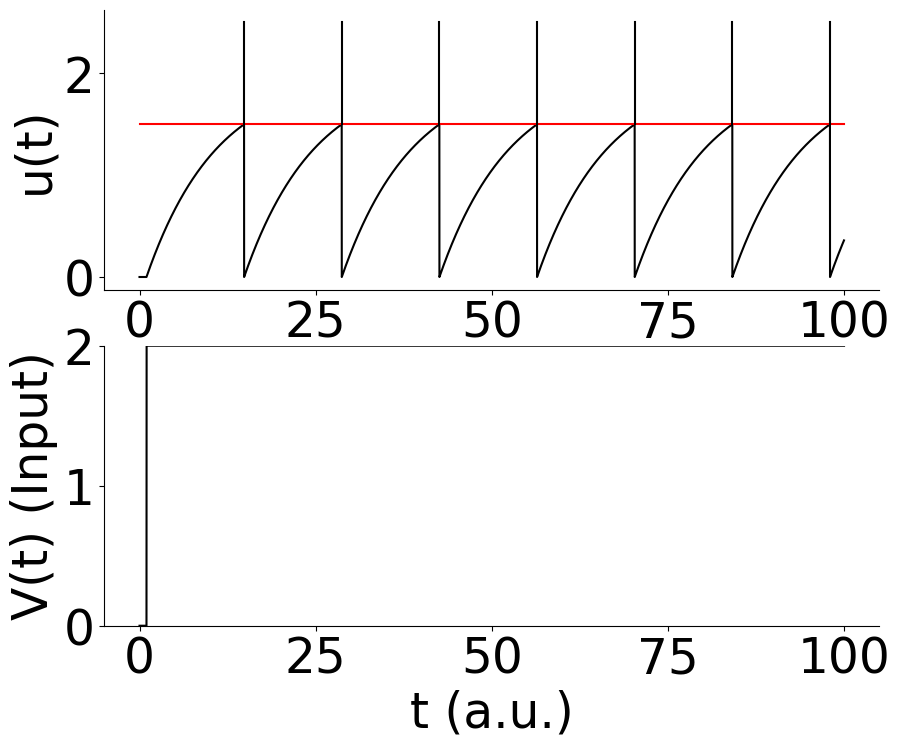

In [ ]:
## Creation of the figure

plt.rcParams.update({'font.size': 35})

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10, 8))
plt.rcParams['figure.constrained_layout.use'] = True


## Plot of the activity of the neuron across time
ax1.plot(np.arange(0,T)*lif.dt,x,color='black')

## Plot of the threshold
ax1.plot([0, T*lif.dt],[lif.theta, lif.theta],color='red')


## In the following loop,  draw a vertical line for each instance the neuron has fired
for t in range(T):
    
    ## If the neuron fires
    if Spike[t]==1.:
        
        ## Draw the vertical line
        ax1.plot([t*lif.dt,t*lif.dt],[lif.theta, lif.theta+1],color='black')

## Plot of the input
ax2.plot(np.arange(0,T)*lif.dt,Input,color='black')


## Set labels and 
ax1.set_xlabel('t (a.u.)')
ax1.set_ylabel('u(t)')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)


ax2.set_xlabel('t (a.u.)')
ax2.set_ylabel('V(t) (Input)')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_ylim([0,2])

## Of course, if the input is less than the threshold the neuron does not fire and its activity saturates at the input given.


In [ ]:
#– Show the behaviour of the neuron and measure the time interval between
#successive spikes

#Finding the times of the spikes

spike_times=[]
for i in range(len(list(x))):
    if x[i]==np.max(x):
        print(i)
        spike_times.append(i)
        
# Calculating the difference in time between consecutive spikes
spike_time_diff=[x - spike_times[i - 1] for i, x in enumerate(spike_times)][1:]

print(f"The average time interval between successive spikes is {np.mean(spike_time_diff)}")

1484
2870
4256
5642
7028
8414
9800
The average time interval between successive spikes is 1386.0


In [5]:
# Creating a list of Tau values
tau_values = np.linspace(10,60,num=6)
print(tau_values)

time_interval_for_spikes=[]
for i in tau_values:
    lif=LIF()

    T=1000000
    Input=np.concatenate([np.zeros([100]),np.ones([T-100])*2])            ## Definition of the input, which is equal to zero for 
                                                                            ## the first 100 steps and then equal to the constant 1.5

    tau=i    ## Value of tau              

    x,Spike=lif.Response(Input,tau)       ## Computation of the neuron response
    
    spike_times=[]
    for i in range(len(list(x))):
        if x[i]==np.max(x):
            spike_times.append(i)
        if len(spike_times)>10:
          break
    
    spike_time_diff=[x - spike_times[i - 1] for i, x in enumerate(spike_times)][1:]
    time_interval_for_spikes.append(np.mean(spike_time_diff))

[10. 20. 30. 40. 50. 60.]


(array([    0.,  2500.,  5000.,  7500., 10000.]),
 [Text(0, 0.0, '0'),
  Text(0, 2500.0, '2500'),
  Text(0, 5000.0, '5000'),
  Text(0, 7500.0, '7500'),
  Text(0, 10000.0, '10000')])

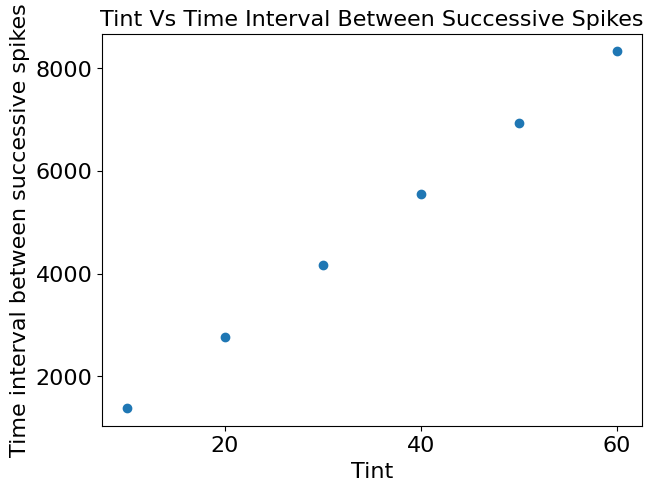

In [ ]:
plt.scatter(tau_values,time_interval_for_spikes)
plt.xlabel('Tint',fontsize=16)
plt.ylabel('Time interval between successive spikes',fontsize=16)
plt.title('Tint Vs Time Interval Between Successive Spikes',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [ ]:
# As expected, the greater the value of Tau then the slower the change in the network's potential. Rearranging the equation would show that the rate of change of the potential is inversely proportional to Tau.


In [ ]:
 time_interval_for_spikes

[1386.0, 1386.0, 1386.0, 1386.0, 1386.0]

<Figure size 640x480 with 0 Axes>

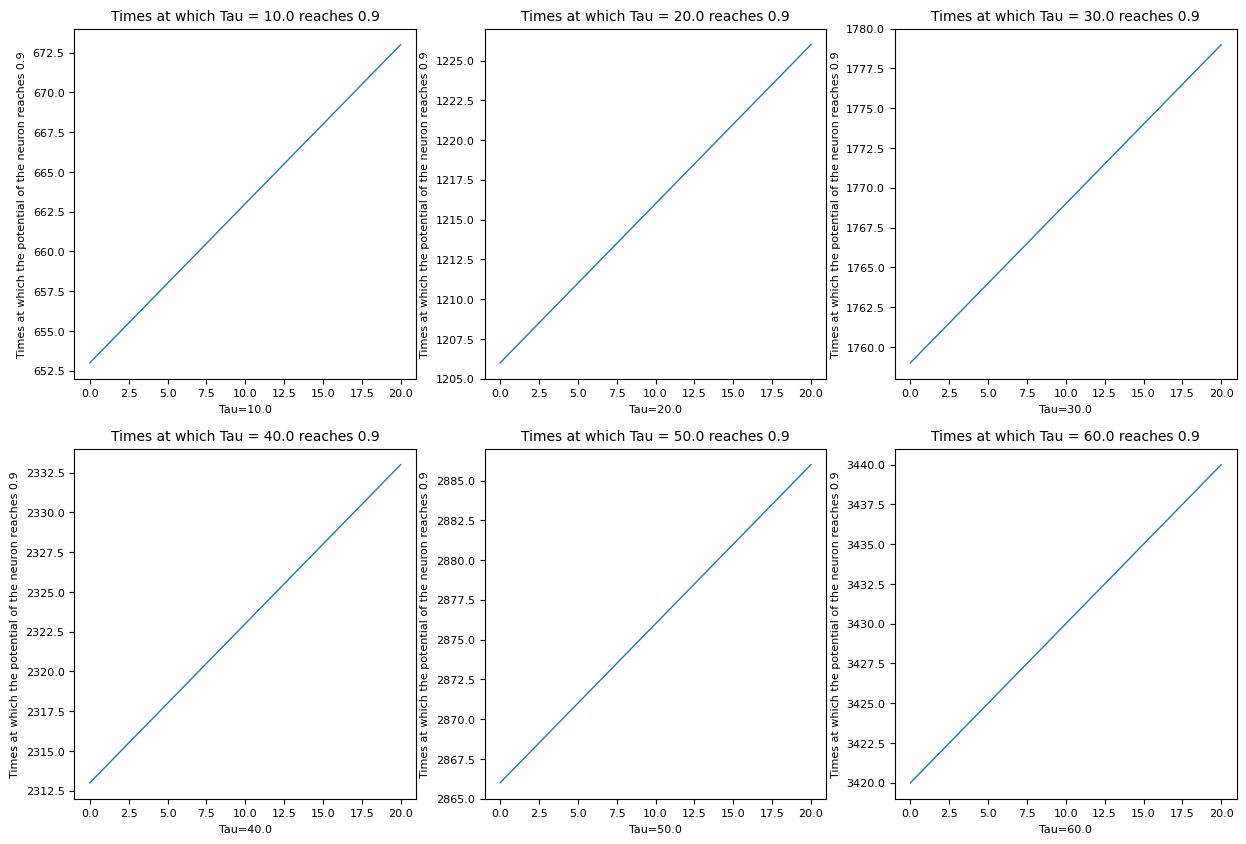

In [6]:
tau_values=list(tau_values)
axes_list=[]
plt.clf()
fig, axes = plt.subplots(2,3,figsize=(15, 10))

for i in tau_values:
    lif=LIF()

    T=7000
    Input=np.concatenate([np.zeros([100]),np.ones([T-100])*2])            ## Definition of the input, which is equal to zero for 
                                                                            ## the first 100 steps and then equal to the constant 1.5

    tau=i    ## Value of tau              

    x,Spike=lif.Response(Input,tau) 

    times_at_point_nine=[]
    for j in range(len(list(x))):
        if round(x[j],1)==0.9:
            times_at_point_nine.append(j)
        if len(times_at_point_nine)>20:
          break

    ax = axes[tau_values.index(i)//3, tau_values.index(i)%3]

    ax.plot(times_at_point_nine, linewidth=1)

    ax.set_xlabel(f"Tau={i}",fontsize=8)
    ax.set_ylabel("Times at which the potential of the neuron reaches 0.9",fontsize=8)
    ax.set_title(f"Times at which Tau = {i} reaches 0.9",fontsize=10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    axes_list.append(ax)

for ax in axes_list:
    ax.plot()


In [7]:
# A similar conclusion is reached when discussing the impact of increasing Tau and the times at which the neuron reaches a potential of 0.9.
# The function for calculating the spikes merely compared each potential value against the maximum value (spike value) and saved the corresponding index for this index
# Only the first 10 times for the spikes are obtained
# The consecutive difference between each time value is calculated and averaged
# The tau values are plotted against their corresponding average time value

# A similar approach is adopted for calculating the times at which the potential reaches 0.9 for each Tau value
# Similarities range from using two for loops and using the same leaky-integrate function to calculate the relevant potentials 
# The differences are as follows:
# A facet plot is produced to visually display the different time values for each Tau value
# The calculated pontentials are rounded to the first decimal point and compared against the target 0.9 potential 
# The first 20 time values are stored instead of 10 to increase the size of the displayed data



In [1]:
# Question 2

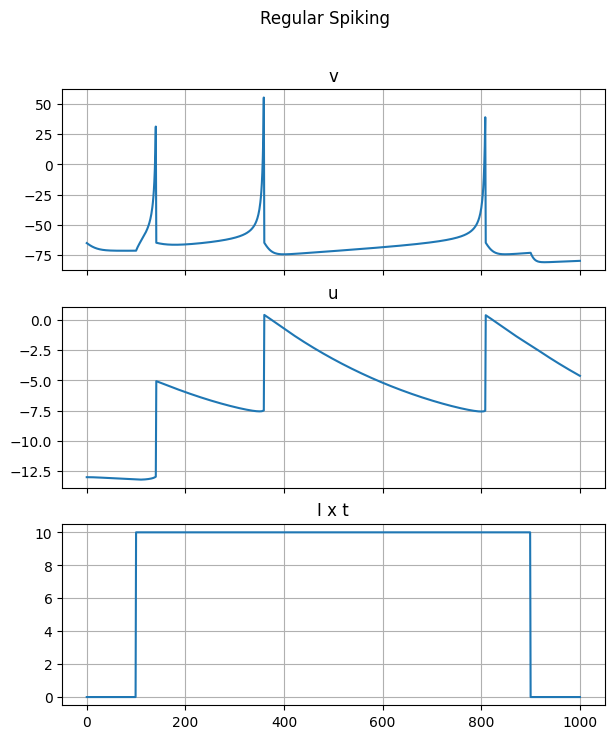

In [2]:
"""
REFERENCE - https://medium.com/@celinesoeiro/izhikevich-neuron-a-python-approach-c6d6a68bb0eb
The Izhikevich model can be represented through an 2-D system of differential 
equations:
    
    dvdt = 0.04*v*v + 5*v + 140 - u + I
    dudt = a*(b*v - u)
    
    with conditions: 
        if v >= 30mV, then v = c and u = u + d
    
    for excitatory neurons: 
        (ai,bi) = (a,b)
        (ci,di) = (c,d) + (15, -6)r**2
    for inhibitory neurons:
        (ai,bi) = (a,b) + (0.08, -0.05)*r
        (ci,di) = (c,d)
    u: Equation variable - Represents membrane recovery variable
    v: Equation variable - Represents membrane potential of the neuron
    a: Equation parameter - Time scale of the recovery variable u
    b: Equation parameter - Sensitivity of u to the fluctuations in v
    c: Equation parameter - After-spike reset value of v
    d: Equation parameter - After-spike reset value of u
    
    excitatory_neurons: Number of excitatory neurons
    inhibitory_neurons: Number of inhibitory neurons
    excitatory_vector: Column vector of excitatory neurons
    inhibitory_vector: Column vector of inhibitory neurons
"""
# Producing a regular spiking IZH 

import numpy as np
from random import seed, random
import matplotlib.pyplot as plt

params = {'a': 0.02, 'b': 0.2, 'c': -65, 'd': 8}
neuron_type = 'excit'
current_value = 10
current_start = 100
current_finish = 900
voltage_pick = 30
simulation_time = 100
time_step = 0.1
neurons = 1

seed(1)

# Parameters according Izhikevich article 
random_factor = random()

if (neuron_type == 'excitory' or 'excit'):
    a = params['a']
    b = params['b']
    c = params['c'] + 15*random_factor**2
    d = params['d'] - 6*random_factor**2

elif (neuron_type == 'inhibitory' or 'inib'):
    a = params['a'] + 0.08*random_factor
    b = params['b'] - 0.05*random_factor
    c = params['c']
    d = params['d']
    
time = np.arange(0, simulation_time + time_step, time_step) 

I = np.zeros(len(time))
I[current_start:current_finish] = current_value

v = np.zeros(len(time))    
v[0] = -65

u = np.zeros(len(time))    
u[0] = b*v[0]

# Izhikevich neuron equations
def dvdt(v, u, I):
    return 0.04*v**2 + 5*v + 140 - u + I

def dudt(v,u):
    return a*(b*v - u)

fired = []

for t in range(1, len(time)):     
    vc = v[t - 1]
    uc = u[t - 1]
    Ic = I[t - 1]
    
    if (vc >= voltage_pick):
        vc = v[t]
        v[t] = c
        u[t] = uc + d
        fired.append(t)
    
    else:        
        # solve using Euler
        dv = dvdt(vc, uc, Ic)
        du = dudt(vc, uc)
        v[t] = vc + dv*time_step
        u[t] = uc + du*time_step


fig, axs = plt.subplots(3, sharex=True, figsize=(7,8))
fig.suptitle("Regular Spiking")
axs[0].plot(v)
axs[0].set_title('v')
axs[0].grid()

axs[1].plot(u)
axs[1].set_title('u')
axs[1].grid()

axs[2].plot(I)
axs[2].set_title('I x t')
axs[2].grid()

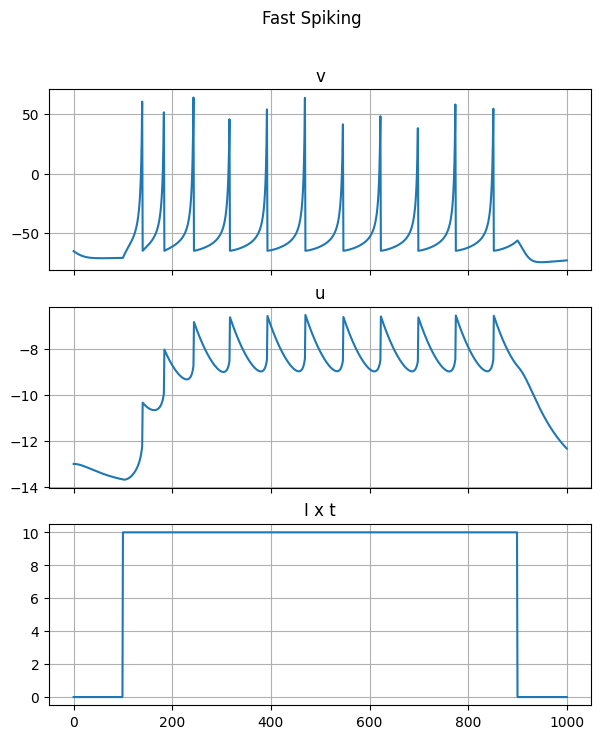

In [4]:
# Producing an excitatory model


import numpy as np
from random import seed, random
import matplotlib.pyplot as plt

params = {'a': 0.1, 'b': 0.2, 'c': -65, 'd': 2}
neuron_type = 'excit'
current_value = 10
current_start = 100
current_finish = 900
voltage_pick = 30
simulation_time = 100
time_step = 0.1
neurons = 1

seed(1)

# Parameters according Izhikevich article 
random_factor = random()

if (neuron_type == 'excitory' or 'excit'):
    a = params['a']
    b = params['b']
    c = params['c'] + 15*random_factor**2
    d = params['d'] - 6*random_factor**2

elif (neuron_type == 'inhibitory' or 'inib'):
    a = params['a'] + 0.08*random_factor
    b = params['b'] - 0.05*random_factor
    c = params['c']
    d = params['d']
    
time = np.arange(0, simulation_time + time_step, time_step) 

I = np.zeros(len(time))
I[current_start:current_finish] = current_value

v = np.zeros(len(time))    
v[0] = -65

u = np.zeros(len(time))    
u[0] = b*v[0]

# Izhikevich neuron equations
def dvdt(v, u, I):
    return 0.04*v**2 + 5*v + 140 - u + I

def dudt(v,u):
    return a*(b*v - u)

fired = []

for t in range(1, len(time)):     
    vc = v[t - 1]
    uc = u[t - 1]
    Ic = I[t - 1]
    
    if (vc >= voltage_pick):
        vc = v[t]
        v[t] = c
        u[t] = uc + d
        fired.append(t)
    
    else:        
        # solve using Euler
        dv = dvdt(vc, uc, Ic)
        du = dudt(vc, uc)
        v[t] = vc + dv*time_step
        u[t] = uc + du*time_step


fig, axs = plt.subplots(3, sharex=True, figsize=(7,8))
fig.suptitle("Fast Spiking")
axs[0].plot(v)
axs[0].set_title('v')
axs[0].grid()

axs[1].plot(u)
axs[1].set_title('u')
axs[1].grid()

axs[2].plot(I)
axs[2].set_title('I x t')
axs[2].grid()

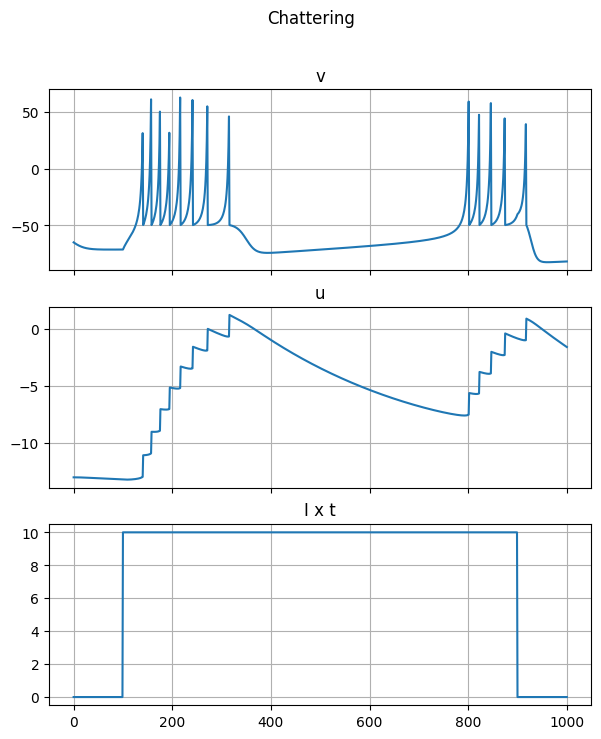

In [5]:
import numpy as np
from random import seed, random
import matplotlib.pyplot as plt

params = {'a': 0.02, 'b': 0.2, 'c': -50, 'd': 2}
neuron_type = 'excit'
current_value = 10
current_start = 100
current_finish = 900
voltage_pick = 30
simulation_time = 100
time_step = 0.1
neurons = 1

seed(1)

# Parameters according Izhikevich article 
random_factor = random()

if (neuron_type == 'excitory' or 'excit'):
    a = params['a']
    b = params['b']
    c = params['c'] + 15*random_factor**2
    d = params['d'] - 6*random_factor**2

elif (neuron_type == 'inhibitory' or 'inib'):
    a = params['a'] + 0.08*random_factor
    b = params['b'] - 0.05*random_factor
    c = params['c']
    d = params['d']
    
time = np.arange(0, simulation_time + time_step, time_step) 

I = np.zeros(len(time))
I[current_start:current_finish] = current_value

v = np.zeros(len(time))    
v[0] = -65

u = np.zeros(len(time))    
u[0] = b*v[0]

# Izhikevich neuron equations
def dvdt(v, u, I):
    return 0.04*v**2 + 5*v + 140 - u + I

def dudt(v,u):
    return a*(b*v - u)

fired = []

for t in range(1, len(time)):     
    vc = v[t - 1]
    uc = u[t - 1]
    Ic = I[t - 1]
    
    if (vc >= voltage_pick):
        vc = v[t]
        v[t] = c
        u[t] = uc + d
        fired.append(t)
    
    else:        
        # solve using Euler
        dv = dvdt(vc, uc, Ic)
        du = dudt(vc, uc)
        v[t] = vc + dv*time_step
        u[t] = uc + du*time_step


fig, axs = plt.subplots(3, sharex=True, figsize=(7,8))
fig.suptitle("Chattering")
axs[0].plot(v)
axs[0].set_title('v')
axs[0].grid()

axs[1].plot(u)
axs[1].set_title('u')
axs[1].grid()

axs[2].plot(I)
axs[2].set_title('I x t')
axs[2].grid()

In [6]:
# The first figure corresponds to regular spiking.
# A stable firing rate is observed from the first diagram and produces fewer spikes which is produced by setting the parameters - a=0.02, b=0.2, c=-65, d=8
# The second figure is connected to fast spiking.
# A high firing rate is observed from the second diagram and produces several spikes which is produced by setting the parameters - a=0.1, b=0.2,c=-65,d=2
# The third figure corresponds to chattering.
# An uneven firing rate results in irregular spikes and produces irregular spikes and longer quiet breaks inbetween. This phenonemon is produced by setting the parameters - a=0.02,b=0.2,c=-50,d=2